In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np
import scipy

from tensorflow.examples.tutorials.mnist import input_data
from tsne import bh_sne

from models import FullyConnectedDiscriminator, ConvDiscriminator, FullyConnectedVAE

result_dirs = [('FC 100 Relu', './results/FullyConnected100ReluDiscriminator/2017-05-03-11-42-37/'),
               ('FC 10 Relu', './results/FullyConnected10ReluDiscriminator/2017-05-04-10-38-11/'),
               ('FC 200 Relu', './results/FullyConnected200ReluDiscriminator/2017-05-04-09-09-18/'),
               ('FC 100 Relu 2', './results/FullyConnected100ReluDiscriminator2/2017-05-04-09-10-51/'),
               ('FC 100 Sigmoid', './results/FullyConnected100SigmoidDiscriminator/2017-05-03-11-47-58/'),
               ('FC 10 Sigmoid', './results/FullyConnected10SigmoidDiscriminator/2017-05-03-12-30-30/'),
               #('Conv 5 Features', './results/Conv5FeaturesDiscriminator/2017-05-04-14-16-29/'),
               #('Conv 8 Features', './results/Conv8FeaturesDiscriminator/2017-05-04-14-11-02/'),
               ('FC 10 VAE', './results/FullyConnectedVAE/2017-05-08-09-54-56/'),
               ('FC 100 VAE', './results/FullyConnected100VAE/2017-05-08-09-58-32/'),]

# seed = 0
batch_size = 1000

mnist = input_data.read_data_sets('data/', validation_size=batch_size)
images, labels = mnist.validation.next_batch(batch_size)
# bh_sne needs data as float64
images = np.asarray(images).astype('float64')

distance_matrices = []

for i, item in enumerate(result_dirs):
    name = item[0]
    result_dir = item[1]
    with open(result_dir + 'config.json', 'r') as config_file:
        config = json.load(config_file)
    if config.get('vae', False):
        if config['conv']:
            print('Loading a convolutional vae')
            raise NotImplementedError('Convolutional VAE not implemented yet')
        else:
            print('Loading a fully connected vae')
            model = FullyConnectedVAE(config)
    else:
        if config.get('conv', False):
            print('Loading a convolutional discriminator')
            model = ConvDiscriminator(config)
        else:
            print('Loading a fully connected discriminator')
            model = FullyConnectedDiscriminator(config)
    sess = model.sess
    representation = sess.run(model.representation, {model.x: images})
    # bh_sne needs data as float64
    representation = np.asarray(representation).astype('float64')
    min_ = np.min(representation)
    max_ = np.max(representation)
    representation = (representation - min_) / (max_ - min_)
    
    '''
    sne_data = bh_sne(representation)
    sne_x = sne_data[:, 0]
    sne_y = sne_data[:, 1]
    plt.figure(figsize=(20, 15), dpi=100, facecolor='w', edgecolor='k')
    plt.scatter(sne_x, sne_y, c=labels, cmap=plt.cm.get_cmap('jet', 10))
    plt.colorbar(ticks=range(10))
    plt.title(item[0])
    plt.show()
    '''
    
    distance_matrices.append(scipy.spatial.distance.pdist(representation, metric='euclidean'))

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: /home/psoulos/workspace/space-of-representations/results/FullyConnected100ReluDiscriminator/2017-05-03-11-42-37/checkpoints/
INFO:tensorflow:Restoring parameters from /home/psoulos/workspace/space-of-representations/results/FullyConnected100ReluDiscriminator/2017-05-03-11-42-37/checkpoints/checkpoint-50000
Loading a fully connected discriminator
Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Loading the model from folder: /home/psoulos/workspace/space-of-represe

In [8]:
distance_matrices = np.matrix(distance_matrices)
print('Distance matrices shape: {}'.format(distance_matrices.shape))
# bh_sne needs data as float64
distance_matrices = np.asarray(distance_matrices).astype('float64')
meta_sne = bh_sne(distance_matrices, perplexity=2)

Distance matrices shape: (8, 499500)


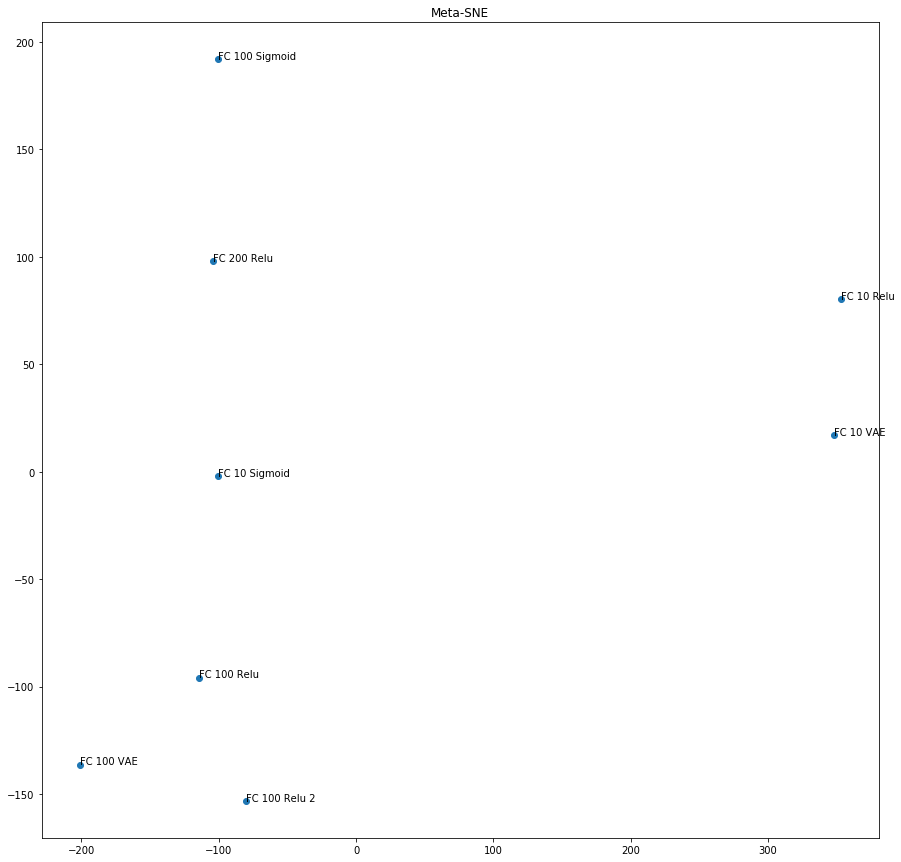

In [9]:
sne_x = meta_sne[:, 0]
sne_y = meta_sne[:, 1]


fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(sne_x, sne_y)
names = [x[0] for x in result_dirs]
for i, name in enumerate(names):
    ax.annotate(name, (sne_x[i], sne_y[i]))
plt.title('Meta-SNE')
plt.show()

#plt.figure(figsize=(5, 5), dpi=100, facecolor='w', edgecolor='k')
#plt#, c=labels, cmap=plt.cm.get_cmap('jet', 10))
#plt.colorbar(ticks=range(10))
#plt.title('Meta-SNE')
#plt.show()



